('Loss of the ', 0, ' iteration for train:', 303.84734828496045)
('Loss of the ', 0, ' iteration for validation:', 272.87421259842517)
('Loss of the ', 1, ' iteration for train:', 278.79840166235613)
('Loss of the ', 1, ' iteration for validation:', 249.58771907492346)
('Loss of the ', 2, ' iteration for train:', 256.12693604313921)
('Loss of the ', 2, ' iteration for validation:', 228.52396878183538)
('Loss of the ', 3, ' iteration for train:', 235.60599620153803)
('Loss of the ', 3, ' iteration for validation:', 209.47007845411355)
('Loss of the ', 4, ' iteration for train:', 217.03030969594678)
('Loss of the ', 4, ' iteration for validation:', 192.23353647481287)
('Loss of the ', 5, ' iteration for train:', 200.21421487629075)
('Loss of the ', 5, ' iteration for validation:', 176.64025475428841)
('Loss of the ', 6, ' iteration for train:', 184.98978690428135)
('Loss of the ', 6, ' iteration for validation:', 162.53280683782441)
('Loss of the ', 7, ' iteration for train:', 171.205142

('Loss of the ', 216, ' iteration for validation:', 16.00169457291085)
('Loss of the ', 217, ' iteration for train:', 25.337345828360561)
('Loss of the ', 217, ' iteration for validation:', 15.964171155578402)
('Loss of the ', 218, ' iteration for train:', 25.292188761531751)
('Loss of the ', 218, ' iteration for validation:', 15.926832979436952)
('Loss of the ', 219, ' iteration for train:', 25.247203160314019)
('Loss of the ', 219, ' iteration for validation:', 15.889678871173274)
('Loss of the ', 220, ' iteration for train:', 25.202388271534005)
('Loss of the ', 220, ' iteration for validation:', 15.852707670189877)
('Loss of the ', 221, ' iteration for train:', 25.157743347751882)
('Loss of the ', 221, ' iteration for validation:', 15.815918228399731)
('Loss of the ', 222, ' iteration for train:', 25.113267647150384)
('Loss of the ', 222, ' iteration for validation:', 15.779309410024345)
('Loss of the ', 223, ' iteration for train:', 25.068960433426891)
('Loss of the ', 223, ' iter

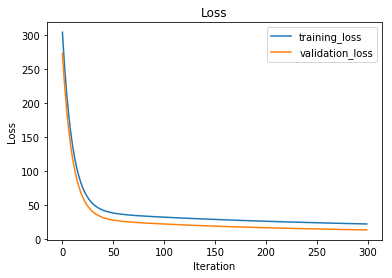

In [1]:
# !python3
# -*- coding:utf-8 -*-
from numpy import *
import pandas as pd
import sklearn.datasets
import sklearn.model_selection
import matplotlib.pyplot as plt
# %matplotlib inline

LEARNING_RATE = 0.01
NUM_ITERATIONS = 300


def  get_data(filename):
    data = sklearn.datasets.load_svmlight_file(filename)
    return data[0], data[1]


def compute_loss(X, y, theta):
    m = shape(X)[0]
    dev = y - dot(X, theta)
    loss = sum(dot(dev.T, dev)) / (2*m)
    return loss


def optimizer_GD(X_train, y_train, X_validation, y_validation, initial_theta, learning_rate, num_iterations):
    m = shape(X_train)[0]
    theta = initial_theta
    Ltrain = []
    Lvalidation = []
    for i in xrange(num_iterations):
        Ltrain.append(compute_loss(X_train, y_train, theta))
        Lvalidation.append(compute_loss(X_validation, y_validation, theta))
        print('Loss of the ', i, ' iteration for train:', Ltrain[i])
        print('Loss of the ', i, ' iteration for validation:', Lvalidation[i])
        G = dot(X_train.transpose(), (dot(X_train, theta)-y_train)) / m
        theta = theta - learning_rate * G

    return Ltrain, Lvalidation


def main():
    # load data
    X, y = get_data('./data/housing_scale')
    X = X.todense()
    y = y.reshape(len(y), 1)

    # devide dataset
    X_train, X_validation, y_train, y_validation = sklearn.model_selection.train_test_split(X, y, test_size=0.25)

    # initialize parameters
    n = shape(X_train)[1]  # number of features
    m_train = shape(X_train)[0]  # number of training examples
    m_validation = shape(X_validation)[0]  # number of training examples
    lr = LEARNING_RATE
    num_iter = NUM_ITERATIONS
    X_train = append(ones(shape=(m_train, 1)), X_train, 1)
    X_validation = append(ones(shape=(m_validation, 1)), X_validation, 1)
    initial_theta = zeros(shape=(n+1, 1))

    # Linear Regression and Gradient Descent
    Ltrain, Lvalidation = optimizer_GD(X_train, y_train, X_validation, y_validation, initial_theta, lr, num_iter)

    # visualization
    num_iter=xrange(num_iter)
    plt.plot(num_iter, Ltrain, label='training_loss')
    plt.plot(num_iter,Lvalidation,label='validation_loss')
    plt.title('Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


if __name__=='__main__':
    main()
